# DS 2023 HW 7

## Instructions

Follow the prompts in this notebook.

Make use of code provided.

Respond with code to generate your answers.
|
If asked to provide a specific response, create a Markdown cell after your code cell(s) with the response.

NOTE: To save as a PDF, first export your notebook to HTML, open it in a browser, and the print the web page to PDF.

**10 Points**

## Student Info

Write your name and computer ID below.

- NAME: Chloe Wang
- ID: Qtr7bs

## Overview

In this assignment, you will use Plotly's `.parallel_categories()` function to produce alluvial diagrams for an ecommerce data set. Based on these diagrams, you will answer questions about the ecommerce data they represent.

The data set was downloaded from [Kaggle](https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset) and modified.

According to the site, 

> This file contains behavior data for a one month (November 2019) from a large multi-category online store, collected by Open CDP project. Each row in the file represents an event. All events are related to products and users. There are different types of events.

Here, also, is a condensed version of the **data dictionary** from the site:

* **Customer ID**: A unique identifier assigned to each customer.
* **Gender**: _Categorical_ (Male, Female). Specifies the gender of the customer.
* **Age**: _Numeric_. Represents the age of the customer.
* **City**: _Categorical_ (City names) Indicates the city of residence for each customer.
* **Membership Type**: _Categorical_ (Gold, Silver, Bronze) Identifies the type of membership held by the customer.
* **Total Spend**: _Numeric_. Records the total monetary expenditure by the customer on the e-commerce platform.
* **Items Purchased**: _Numeric_. Quantifies the total number of items purchased by the customer.
* **Average Rating**: _Numeric_ (0 to 5, with decimals). Represents the average rating given by the customer for purchased items.
* **Discount Applied**: _Boolean_ (True, False). Indicates whether a discount was applied to the customer's purchase.
* **Days Since Last Purchase**: _Numeric_. Reflects the number of days elapsed since the customer's most recent purchase.
* **Satisfaction Level**: _Categorical_ (Satisfied, Neutral, Unsatisfied). Captures the overall satisfaction level of the customer.

Note these names have been altered in the data set to be more usable in the code.

## Compliance with Homework Submission Guidelines

1 pt

## Set Up

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

This should help solves problem with rendering the Plotly images when saving to PDF.

**NOTE:** If you have problems having the images render when saving to PDF, save them as PNG files using the small camera icon (in the upper right hand corner of the displayed image) and insert them into your notebook using Markdown syntax, i.e. `![](imagefile.png)`. 

In [3]:
import plotly.offline as py
py.init_notebook_mode()

In [4]:
import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items


### Read in the Data

In [5]:
ECOM = pd.read_csv("ecommerce-mod.csv")
ECOM.head()

customer_id  gender  age           city membership_type  total_spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   items_purchased  average_rating  discount_applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   days_since_last_purchase satisfaction_level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3                        12          Satisfied  
4                        55        Unsatisfied

### Define a Convenience Function for Plotting

In [17]:
def alluvialplot(df, dim_cols:list, color_col:str, title=None):
    
    # The color column must be a category
    if df[color_col].dtype != 'category':
        df[color_col] = df[color_col].astype('category')
    
    fig = px.parallel_categories(
        df, 
        dimensions=dim_cols,
        color=df[color_col].cat.codes,
        height=1000,
        width=800,
        title=title
    )
    fig.update_traces(line={'shape': 'hspline'})
    fig.update_layout(coloraxis_showscale=False)
    fig.show()

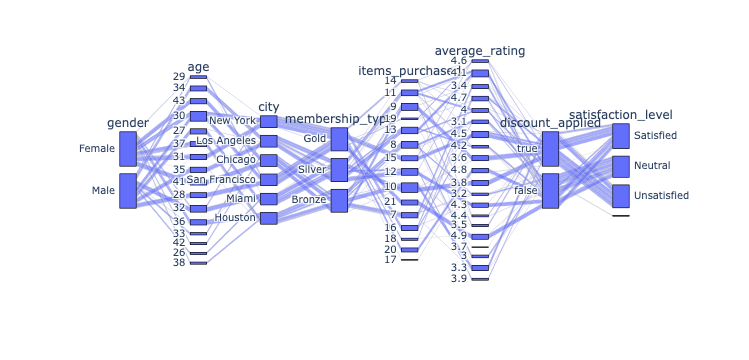

In [20]:
px.parallel_categories(ECOM)

## Tasks

### Task 1: Plot

1 pt

Create an alluvial diagram that shows Gender, Age, and Membership Type.

(Always show categories in the order they are given in each question.)

Sort the data frame that is passed to the function by Age.

Color the bands by Gender.

In [1]:
ECOM.head()

NameError: name 'ECOM' is not defined

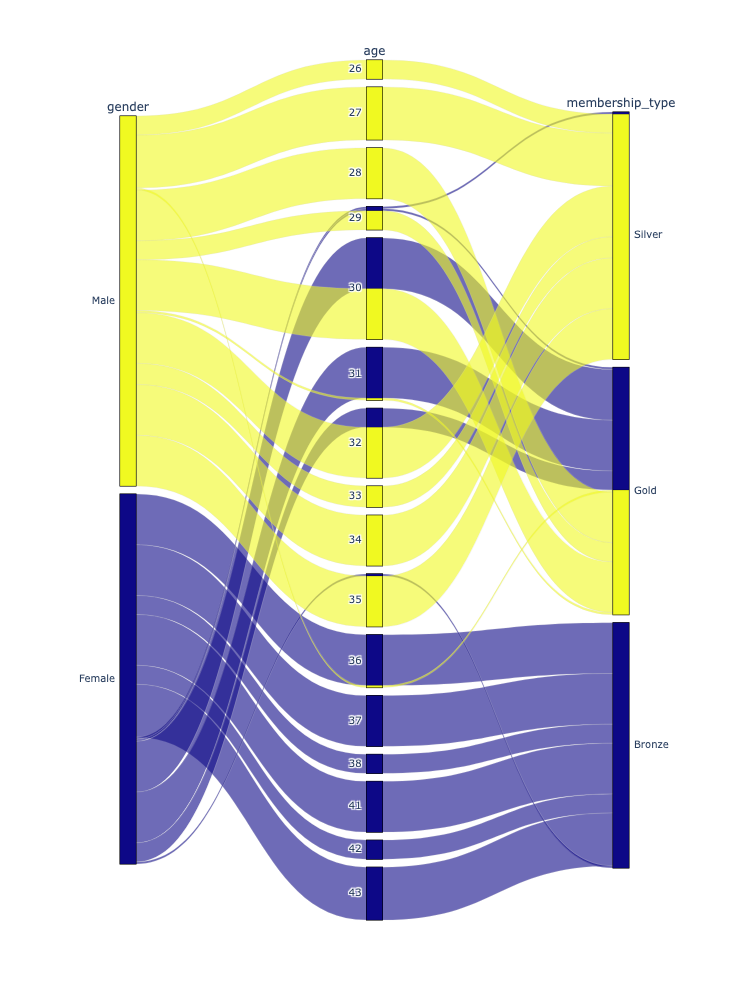

In [30]:
ECOM_sorted = ECOM.sort_values("age", ascending = True)
alluvialplot(ECOM_sorted, dim_cols = ['gender', 'age', 'membership_type'], color_col = 'gender', title=None)

### Task 2: Interpret

1 pt

List the values from Gender that have Bronze memberships.

## Females had 116 Bronze Memberships. Males had no Bronze Memberships

### Task 3: Interpret

1 pt

How would you characterize the demographic associatded with Bronze membership? Specify in terms of Gender and Age range, i.e. give the minimum and maximum Ages associated with the Membership Type.

## The demographic associated with Bronze Memberships is solely females between the ages of 35-43.

### Task 4: Plot

1 pt

Create an alluvial diagram that shows Gender, City, and Average Rating.

Color the bands by City.

Sort the data frame by Average Rating.

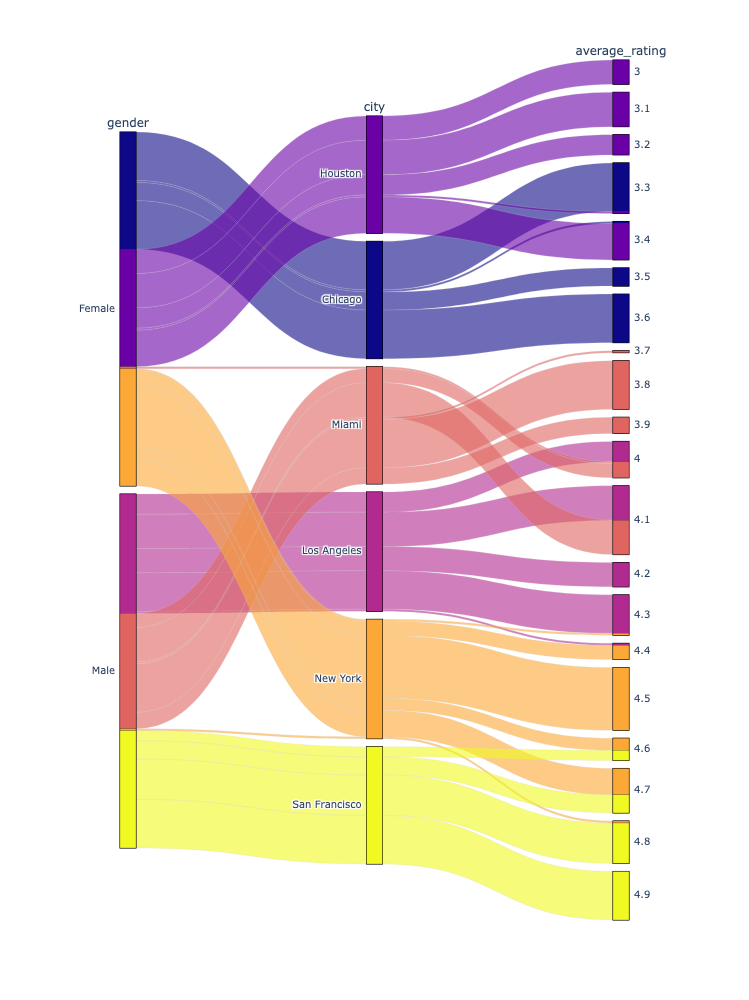

In [31]:
ECOM_sorted = ECOM.sort_values("average_rating", ascending = True)
alluvialplot(ECOM_sorted, dim_cols = ['gender', 'city', 'average_rating'], color_col = 'city', title=None)

### Task 5: Interpret

1 pt

Characterize the demographic with the highest Satisfaction Level in terms of Gender and City.

## The demographic with the highest average satisfaction level in terms of gender and city is males who live in San Francisco.

### Task 6: Interpret

1 pt

Characterize the demographic with the lowest Satisfaction Level in terms of Gender and City.

## The demographic with the lowest satisfaction level in terms of gender and city is females from Houston. 

### Task 7: Plot

1 pt

Create an alluvial diagram that shows Gender, City, and Items Purchased.

Color the bands by City.

Sort the data frame by Items Purchased.

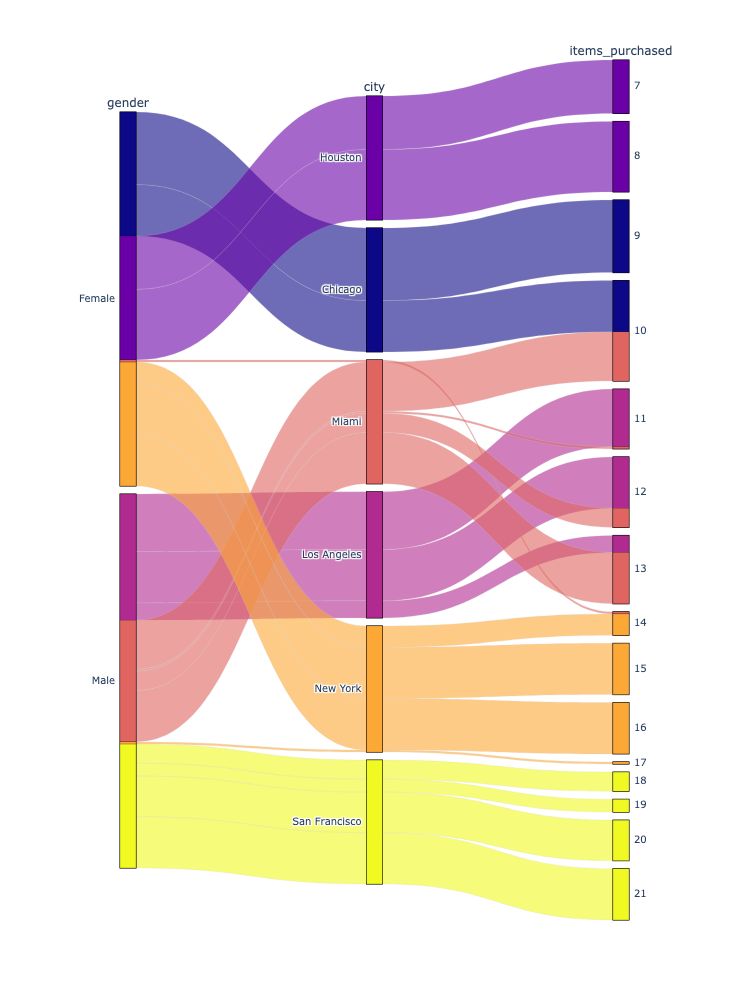

In [37]:
ECOM_sorted = ECOM.sort_values("items_purchased", ascending = True)
alluvialplot(ECOM_sorted, dim_cols = ['gender', 'city', 'items_purchased'], color_col = 'city', title=None)

### Task 8: Interpret

1 pt

Do the demographics for the most and least Items Purchase match those for the Average Rating?

## Yes it matches. The demographic who purchased the most items are males from San Francisco. While the demographic who purchase the least items are females from Houston

### Task 9: Interpret

1 pt

Based on the three diagrams above, do you find that the data set is balanced or imbalanced relative to the combinations of Genders and Cities? A balanced data set would have roughly equal numbers of observations for each combination of Gender and City.

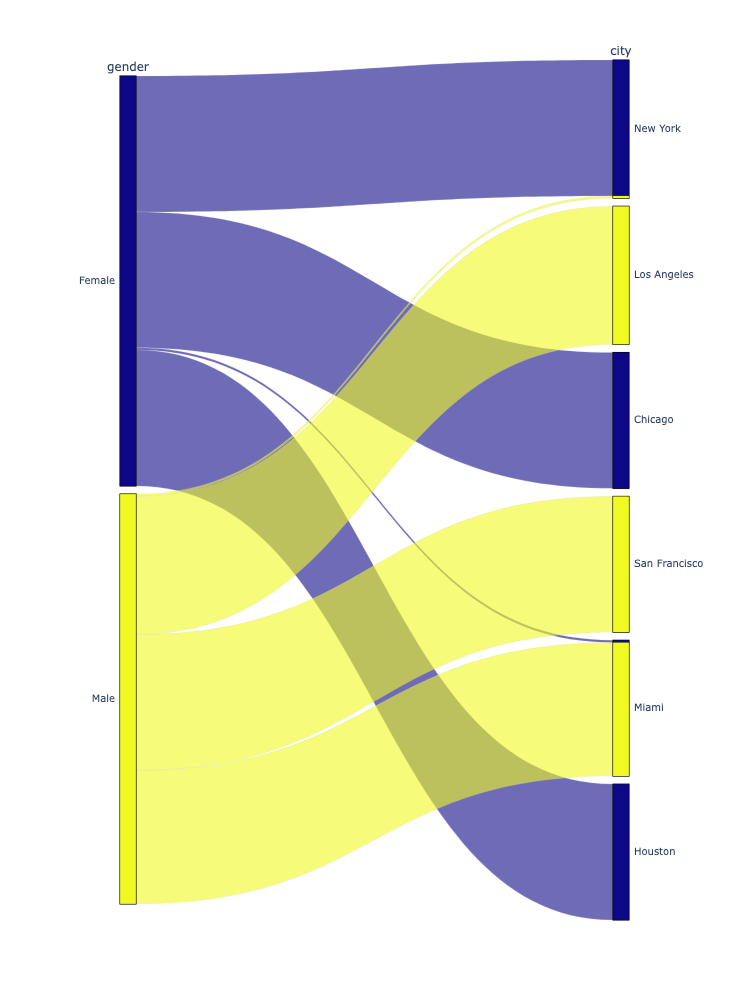

In [38]:
alluvialplot(ECOM, dim_cols = ['gender', 'city'], color_col = 'gender', title=None)

## I think this dataset is roughly balanced in terms of having around the same number of observations per city (~58) and around the same number of observations per gender (175). The only thing is that each gender dominates a city. There are only two cities that have observations of both gender, so this may skew the results. 